# HW3 Question2

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.externals.six import StringIO  
dot_data = StringIO()
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
import warnings
warnings.filterwarnings('ignore')
from scipy import interp
from itertools import cycle
from sklearn import tree
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
import scikitplot as skplt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#import lightgbm
from xgboost import XGBClassifier

In [22]:
data = pd.read_csv('/Users/yuxuanwang/Desktop/competition/model/3contrat.csv',index_col=['Time'])

In [23]:
data.head()

,Close,Price_cny,Price_eur,Price_inr,Price_brl,Price_mxn,sent_china,sent_farm,sent_agri,avg_temp,...,Soybean_Imports,Soybean_Exports,soyoil_imports,soyoil_exports,US_Dollar_Index,RapesPrice,SunflowerPrice,CottonseedPrice,Corn_Price,Fertilizer_Price
Time,,,,,,,,,,,,,,,,,,,,,
2017-11-15,985.0,6.6235,0.8481,65.270,3.3133,19.2510,-0.50,0.0,0.0,42.397890,...,1428,337644,3,2,115,377.50,110,84,338.25,1269.87
2017-11-16,983.0,6.6307,0.8496,65.295,3.2740,19.0590,1.25,0.0,0.0,35.473987,...,1428,337644,3,2,111,379.00,103,85,336.50,1285.48
2017-11-17,996.5,6.6268,0.8478,65.015,3.2574,18.9140,0.00,0.0,0.0,41.314295,...,1428,337644,3,2,101,378.75,106,90,343.00,1282.79
2017-11-20,998.5,6.6350,0.8524,65.100,3.2574,18.9937,0.00,0.0,0.0,38.586274,...,1428,337644,3,2,109,375.25,117,100,345.00,1282.16
2017-11-21,998.0,6.6296,0.8519,64.880,3.2588,18.7745,0.00,0.0,0.0,37.409954,...,1428,337644,3,2,100,375.75,127,91,345.00,1294.32


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
df = data.reset_index(drop = False)
df
columns2 = df.columns.tolist()
columns2

['Time',
 'Close',
 'Price_cny',
 'Price_eur',
 'Price_inr',
 'Price_brl',
 'Price_mxn',
 'sent_china',
 'sent_farm',
 'sent_agri',
 'avg_temp',
 'avg_prcp',
 'Soybean_Imports',
 'Soybean_Exports',
 'soyoil_imports',
 'soyoil_exports',
 'US_Dollar_Index',
 'RapesPrice',
 'SunflowerPrice',
 'CottonseedPrice',
 'Corn_Price',
 'Fertilizer_Price']

In [28]:
columns2 = [c for c in columns2 if c not in['Time','Close']]
columns2

['Price_cny',
 'Price_eur',
 'Price_inr',
 'Price_brl',
 'Price_mxn',
 'sent_china',
 'sent_farm',
 'sent_agri',
 'avg_temp',
 'avg_prcp',
 'Soybean_Imports',
 'Soybean_Exports',
 'soyoil_imports',
 'soyoil_exports',
 'US_Dollar_Index',
 'RapesPrice',
 'SunflowerPrice',
 'CottonseedPrice',
 'Corn_Price',
 'Fertilizer_Price']

In [30]:
target ='Close'
target

'Close'

In [33]:
train2 = df.sample(frac=0.8, random_state=1)
test2 = df.loc[~df.index.isin(train2.index)]

In [34]:
print(train2.shape) #need to have same number of features only difference should be obs
print(test2.shape)

(396, 22)
(99, 22)


In [56]:
model = RandomForestRegressor(random_state=1)

411     918.75
107     993.75
165     896.00
197     906.50
320     964.00
164     887.00
464     908.75
173     919.50
34      988.00
326     953.75
67     1007.25
85     1003.00
260     955.75
230     963.75
445     885.25
323     961.00
394     926.25
300     976.00
159     924.00
213     929.50
344     943.00
31      986.25
366     883.50
285     975.00
192     927.50
128     997.75
341     937.25
437     914.00
142     975.75
307     976.50
        ...   
57     1000.25
301     972.00
378     878.25
359     915.00
36      985.75
443     900.25
20      984.00
435     916.00
332     948.75
75     1012.50
200     913.00
77     1001.75
263     967.25
488     958.50
149     926.75
434     907.50
2       996.50
52      999.75
262     956.25
253     955.00
452     901.75
259     945.75
333     956.50
369     873.25
321     964.00
183     949.25
151     917.50
485     959.00
302     973.25
190     941.00
Name: Close, Length: 396, dtype: float64

In [57]:
model.fit(train2[columns2], train2[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [58]:
predictions_rf = model.predict(test2[columns2])

In [59]:
df.columns

Index(['Time', 'Close', 'Price_cny', 'Price_eur', 'Price_inr', 'Price_brl',
       'Price_mxn', 'sent_china', 'sent_farm', 'sent_agri', 'avg_temp',
       'avg_prcp', 'Soybean_Imports', 'Soybean_Exports', 'soyoil_imports',
       'soyoil_exports', 'US_Dollar_Index', 'RapesPrice', 'SunflowerPrice',
       'CottonseedPrice', 'Corn_Price', 'Fertilizer_Price'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

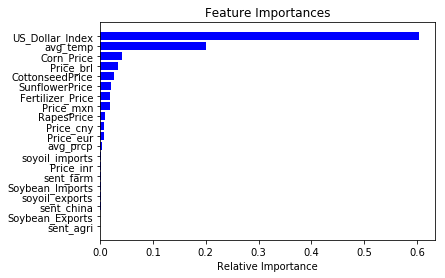

In [60]:
features=df.columns[2:]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [62]:
features

Index(['Price_cny', 'Price_eur', 'Price_inr', 'Price_brl', 'Price_mxn',
       'sent_china', 'sent_farm', 'sent_agri', 'avg_temp', 'avg_prcp',
       'Soybean_Imports', 'Soybean_Exports', 'soyoil_imports',
       'soyoil_exports', 'US_Dollar_Index', 'RapesPrice', 'SunflowerPrice',
       'CottonseedPrice', 'Corn_Price', 'Fertilizer_Price'],
      dtype='object')

In [72]:
np.set_printoptions(precision = 5, suppress = True)

In [73]:
print(importances)

[0.00798 0.00723 0.00177 0.03321 0.01766 0.00058 0.0016  0.00003 0.20037
 0.00294 0.00146 0.00051 0.00217 0.00142 0.60414 0.00987 0.01983 0.0261
 0.04162 0.01951]


In [7]:
# split data into features and target
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
X.shape

(495, 20)

In [10]:
# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
index = pd.DataFrame(X_train).columns

RangeIndex(start=0, stop=20, step=1)

# Feature Selection Using Different Methods

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [12]:
# Using Lasso
X_train_lasso = SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(X_train, y_train)
reg = LogisticRegression(penalty="l1", C=0.1).fit(X_train, y_train)
coef = pd.Series(reg.coef_[0], index = pd.DataFrame(X_train).columns)
X_test_lasso = X_test[:, coef != 0]

ValueError: Unknown label type: 'continuous'

In [ ]:
# Using XGBoost
X_train_xgboost = SelectFromModel(XGBClassifier()).fit_transform(X_train, y_train)

In [18]:
# Using RFE
from sklearn.feature_selection import RFE
X_train_RFE = RFE(estimator=LogisticRegression(), n_features_to_select=30).fit_transform(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [27]:
# Compare the feature selection methods
log_base_clf = LogisticRegression()

# No feature selection
base_scores = cross_val_score(log_base_clf, X_train, y_train, cv=10)
print('Score with no feature selection: ' + str(base_scores.mean()) + ' +/- ' + str(base_scores.std()))

# Lasso feature set
lasso_scores = cross_val_score(log_base_clf, X_train_lasso, y_train, cv=10)
print('Score with Lasso feature selection: ' + str(lasso_scores.mean()) + ' +/- ' + str(lasso_scores.std()))

# Xgboost feature set
xgboost_scores = cross_val_score(log_base_clf, X_train_xgboost, y_train, cv=10)
print('Score with Xgboost feature selection: ' + str(xgboost_scores.mean()) + ' +/- ' + str(xgboost_scores.std()))

# RFE feature set
rfe_scores = cross_val_score(log_base_clf, X_train_RFE, y_train, cv=10)
print('Score with RFE feature selection: ' + str(rfe_scores.mean()) + ' +/- ' + str(rfe_scores.std()))


Score with no feature selection: 0.9233695652173914 +/- 0.011256693031091307
Score with Lasso feature selection: 0.9244565217391305 +/- 0.010580392572789034
Score with Xgboost feature selection: 0.9040760869565219 +/- 0.012155581112144034
Score with RFE feature selection: 0.919836956521739 +/- 0.013159021753047019


# Prediction Using Different Models

## Model Selection Using Nested CV

### 1. Logistic Regression

In [30]:
# Number of random trials
NUM_TRIALS = 5

# Model Initialization
log_clf = linear_model.LogisticRegression()

nested_scores_log = np.zeros(NUM_TRIALS)

p_grid_log = {'penalty': ['l1', 'l2'], 'C': [0.001,0.01,0.1,1,10,100]}

# Logistic Regression Overall Performance
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # Non_nested parameter search and scoring
    clf = RandomizedSearchCV(estimator=log_clf, param_distributions=p_grid_log, cv=inner_cv)
    clf.fit(X_train_lasso, y_train)
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_lasso, y=y_train, cv=outer_cv)
    nested_scores_log[i] = nested_score.mean()

### 2. XGBoost

In [31]:
xg_clf = XGBClassifier()

nested_scores_xg = np.zeros(NUM_TRIALS)

p_grid_xgb = {'n_estimators': range(50, 400, 50), 'max_depth':range(3,10,2),
              'gamma':[i/10.0 for i in range(0,5)],
              'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# XGBoost Overall Performance
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # Non_nested parameter search and scoring
    clf = RandomizedSearchCV(estimator=xg_clf, param_distributions=p_grid_xgb, cv=inner_cv)
    clf.fit(X_train_lasso, y_train)
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_lasso, y=y_train, cv=outer_cv)
    nested_scores_xg[i] = nested_score.mean()

### 3. Random Forest

In [17]:
rf_clf = RandomForestClassifier()

nested_scores_rf = np.zeros(NUM_TRIALS)

p_grid_rf = {'max_depth': [10, 20, 30, 40, 50, 60],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [100, 200, 400]}

# Random Forest Overall Performance
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # Non_nested parameter search and scoring
    clf = RandomizedSearchCV(estimator=rf_clf, param_distributions=p_grid_rf, cv=inner_cv)
    clf.fit(X_train_lasso, y_train)
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_lasso, y=y_train, cv=outer_cv)
    nested_scores_rf[i] = nested_score.mean()

NameError: name 'NUM_TRIALS' is not defined

### 4. LightGBM

In [33]:
lgb_clf = lightgbm.LGBMClassifier()

nested_scores_lgb = np.zeros(NUM_TRIALS)

p_grid_lgb = {
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'n_estimators': [20, 40, 60, 80],
    'num_leaves': range(10, 100, 2)}

# LightGBM Overall Performance
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # Non_nested parameter search and scoring
    clf = RandomizedSearchCV(estimator=lgb_clf, param_distributions=p_grid_lgb, cv=inner_cv)
    clf.fit(X_train_lasso, y_train)
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_lasso, y=y_train, cv=outer_cv)
    nested_scores_lgb[i] = nested_score.mean()

### Model Performance Comparison

In [34]:
performance_dic = {'Logit': nested_scores_log.mean(), 'LightGBM': nested_scores_lgb.mean(), 'XGBoost': nested_scores_xg.mean(),
                              'Random Forest': nested_scores_rf.mean()}

std_dic = {'Logit': nested_scores_log.std(), 'LightGBM': nested_scores_lgb.std(), 'XGBoost': nested_scores_xg.std(),
                              'Random Forest': nested_scores_rf.std()}

performance = pd.DataFrame(list(performance_dic.items()), columns=['Model', 'Accuracy'])
performance['Std'] = performance['Model'].map(std_dic)
performance.index = performance.Model
performance.drop('Model', axis=1)

,Accuracy,Std
Model,,
Logit,0.924022,0.000442
LightGBM,0.950924,0.000442
XGBoost,0.952826,0.000817
Random Forest,0.951522,0.001895


**According the results above, Xgboost algorithm gives us the highest accuracy.**

So we dive deeper into the Xgboost model.

In [35]:
xg_reg = XGBClassifier()
p_grid_xgb = {'n_estimators': range(50, 400, 50), 
              'max_depth':range(3,10,2),
              'gamma':[i/10.0 for i in range(0,5)],
              'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

grid = RandomizedSearchCV(xg_reg, p_grid_xgb, cv = 10, scoring = 'accuracy')
grid.fit(X_train_lasso, y_train)
grid.best_params_

{'reg_alpha': 0.005, 'n_estimators': 350, 'max_depth': 7, 'gamma': 0.3}

In [72]:
xgb = XGBClassifier(reg_alpha=0.005, n_estimators=350, max_depth=7, gamma=0.3)
xgb.fit(X_train_lasso, y_train)
y_pred = xgb.predict(X_test_lasso)
accuracy_score(y_test, y_pred)

0.9630836047774158

### 5. Neural Network

In [45]:
from kerastuner.tuners.bayesian import BayesianOptimization
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
# split data into features and target
XNN = data.iloc[:, :-1]
YNN = data.iloc[:, -1]

X_train_nn, X_test_nn, y_train_nn, y_test_nn \
    = train_test_split(XNN, YNN, test_size=0.2, random_state=100, stratify=YNN)
    
X_train_nn, X_val_nn, y_train_nn, y_val_nn \
    = train_test_split(X_train_nn, y_train_nn, test_size=0.2, random_state=100, stratify=y_train_nn)

In [39]:
# Normalization
sc = StandardScaler()
X_train_nn = sc.fit_transform(X_train_nn)
X_val_nn = sc.transform(X_val_nn)
X_test_nn = sc.transform(X_test_nn)

In [40]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [46]:
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='cost_insensitive_4')

In [47]:
tuner.search(x=X_train_nn,
             y=y_train_nn.to_numpy(),
             epochs=4,
             validation_data=(X_val_nn, y_val_nn.to_numpy()))

Train on 2944 samples, validate on 736 samples
Epoch 1/4
2944/2944 [==============================] - ETA: 1:38 - loss: 0.6931 - accuracy: 0.50 - ETA: 4s - loss: 0.6911 - accuracy: 0.5764 - ETA: 1s - loss: 0.6728 - accuracy: 0.59 - ETA: 0s - loss: 0.6012 - accuracy: 0.60 - ETA: 0s - loss: 0.5555 - accuracy: 0.65 - ETA: 0s - loss: 0.5072 - accuracy: 0.70 - 2s 529us/sample - loss: 0.4891 - accuracy: 0.7174 - val_loss: 0.2246 - val_accuracy: 0.9226
Epoch 2/4
2944/2944 [==============================] - ETA: 0s - loss: 0.2085 - accuracy: 0.93 - ETA: 0s - loss: 0.2671 - accuracy: 0.90 - ETA: 0s - loss: 0.2507 - accuracy: 0.91 - ETA: 0s - loss: 0.2370 - accuracy: 0.91 - ETA: 0s - loss: 0.2354 - accuracy: 0.92 - ETA: 0s - loss: 0.2257 - accuracy: 0.92 - 0s 106us/sample - loss: 0.2231 - accuracy: 0.9260 - val_loss: 0.2017 - val_accuracy: 0.9198
Epoch 3/4
2944/2944 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.93 - ETA: 0s - loss: 0.1652 - accuracy: 0.95 - ETA: 0s - lo

Train on 2944 samples, validate on 736 samples
Epoch 1/4
2944/2944 [==============================] - ETA: 1:13 - loss: 0.6932 - accuracy: 0.43 - ETA: 7s - loss: 0.6924 - accuracy: 0.5531 - ETA: 3s - loss: 0.6895 - accuracy: 0.57 - ETA: 2s - loss: 0.6834 - accuracy: 0.58 - ETA: 1s - loss: 0.6720 - accuracy: 0.58 - ETA: 1s - loss: 0.6550 - accuracy: 0.58 - ETA: 0s - loss: 0.6260 - accuracy: 0.60 - ETA: 0s - loss: 0.5897 - accuracy: 0.64 - ETA: 0s - loss: 0.5640 - accuracy: 0.67 - ETA: 0s - loss: 0.5356 - accuracy: 0.70 - ETA: 0s - loss: 0.5223 - accuracy: 0.72 - 2s 539us/sample - loss: 0.5132 - accuracy: 0.7334 - val_loss: 0.2584 - val_accuracy: 0.9293
Epoch 2/4
2944/2944 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.93 - ETA: 0s - loss: 0.3439 - accuracy: 0.88 - ETA: 0s - loss: 0.3302 - accuracy: 0.89 - ETA: 0s - loss: 0.3207 - accuracy: 0.89 - ETA: 0s - loss: 0.3031 - accuracy: 0.90 - ETA: 0s - loss: 0.2924 - accuracy: 0.90 - ETA: 0s - loss: 0.2763 - accuracy

Train on 2944 samples, validate on 736 samples
Epoch 1/4
2944/2944 [==============================] - ETA: 49s - loss: 0.7022 - accuracy: 0.343 - ETA: 6s - loss: 0.6353 - accuracy: 0.574 - ETA: 3s - loss: 0.5236 - accuracy: 0.70 - ETA: 2s - loss: 0.4592 - accuracy: 0.77 - ETA: 1s - loss: 0.4185 - accuracy: 0.80 - ETA: 1s - loss: 0.3906 - accuracy: 0.83 - ETA: 1s - loss: 0.3687 - accuracy: 0.84 - ETA: 0s - loss: 0.3436 - accuracy: 0.85 - ETA: 0s - loss: 0.3339 - accuracy: 0.86 - ETA: 0s - loss: 0.3321 - accuracy: 0.86 - ETA: 0s - loss: 0.3308 - accuracy: 0.86 - ETA: 0s - loss: 0.3199 - accuracy: 0.87 - ETA: 0s - loss: 0.3086 - accuracy: 0.87 - ETA: 0s - loss: 0.2944 - accuracy: 0.88 - 1s 509us/sample - loss: 0.2909 - accuracy: 0.8838 - val_loss: 0.2164 - val_accuracy: 0.9266
Epoch 2/4
2944/2944 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.96 - ETA: 0s - loss: 0.2351 - accuracy: 0.92 - ETA: 0s - loss: 0.2434 - accuracy: 0.92 - ETA: 0s - loss: 0.2155 - accuracy:

Train on 2944 samples, validate on 736 samples
Epoch 1/4
2944/2944 [==============================] - ETA: 28s - loss: 0.7129 - accuracy: 0.406 - ETA: 1s - loss: 0.6531 - accuracy: 0.601 - ETA: 0s - loss: 0.6130 - accuracy: 0.69 - ETA: 0s - loss: 0.5837 - accuracy: 0.72 - ETA: 0s - loss: 0.5526 - accuracy: 0.75 - 1s 235us/sample - loss: 0.5354 - accuracy: 0.7690 - val_loss: 0.3660 - val_accuracy: 0.8845
Epoch 2/4
2944/2944 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.90 - ETA: 0s - loss: 0.3504 - accuracy: 0.86 - ETA: 0s - loss: 0.3421 - accuracy: 0.87 - ETA: 0s - loss: 0.3232 - accuracy: 0.88 - ETA: 0s - loss: 0.3086 - accuracy: 0.88 - 0s 102us/sample - loss: 0.3085 - accuracy: 0.8886 - val_loss: 0.2320 - val_accuracy: 0.9198
Epoch 3/4
2944/2944 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.96 - ETA: 0s - loss: 0.2494 - accuracy: 0.91 - ETA: 0s - loss: 0.2486 - accuracy: 0.90 - ETA: 0s - loss: 0.2327 - accuracy: 0.91 - ETA: 0s - los

Train on 2944 samples, validate on 736 samples
Epoch 1/4
2944/2944 [==============================] - ETA: 30s - loss: 0.6832 - accuracy: 0.562 - ETA: 0s - loss: 0.2881 - accuracy: 0.893 - ETA: 0s - loss: 0.2808 - accuracy: 0.90 - ETA: 0s - loss: 0.2788 - accuracy: 0.90 - 1s 227us/sample - loss: 0.2786 - accuracy: 0.9062 - val_loss: 0.2725 - val_accuracy: 0.9103
Epoch 2/4
2944/2944 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.93 - ETA: 0s - loss: 0.1967 - accuracy: 0.93 - ETA: 0s - loss: 0.1972 - accuracy: 0.92 - ETA: 0s - loss: 0.1865 - accuracy: 0.93 - 0s 83us/sample - loss: 0.1818 - accuracy: 0.9358 - val_loss: 0.2044 - val_accuracy: 0.9307
Epoch 3/4
2944/2944 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.87 - ETA: 0s - loss: 0.1673 - accuracy: 0.93 - ETA: 0s - loss: 0.1608 - accuracy: 0.94 - ETA: 0s - loss: 0.1658 - accuracy: 0.93 - 0s 78us/sample - loss: 0.1663 - accuracy: 0.9382 - val_loss: 0.1932 - val_accuracy: 0.9402
Epoch 4

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.results_summary()

In [49]:
best_model = tuner.get_best_models(num_models=1)[0]
full_X_train_nn = np.concatenate([X_train_nn, X_val_nn])
full_y_train_nn = np.concatenate([y_train_nn, y_val_nn])

In [50]:
best_model.fit(full_X_train_nn, full_y_train_nn, epochs=20, batch_size=32)
y_pred_nn = best_model.predict_classes(X_test_nn)
accuracy_score(y_test_nn, y_pred_nn)

Train on 3680 samples
Epoch 1/20
3680/3680 [==============================] - ETA: 54s - loss: 0.0519 - accuracy: 0.968 - ETA: 7s - loss: 0.1186 - accuracy: 0.953 - ETA: 3s - loss: 0.1163 - accuracy: 0.95 - ETA: 2s - loss: 0.1302 - accuracy: 0.94 - ETA: 2s - loss: 0.1321 - accuracy: 0.94 - ETA: 1s - loss: 0.1344 - accuracy: 0.94 - ETA: 1s - loss: 0.1349 - accuracy: 0.94 - ETA: 1s - loss: 0.1411 - accuracy: 0.94 - ETA: 0s - loss: 0.1386 - accuracy: 0.94 - ETA: 0s - loss: 0.1398 - accuracy: 0.94 - ETA: 0s - loss: 0.1395 - accuracy: 0.94 - ETA: 0s - loss: 0.1403 - accuracy: 0.94 - ETA: 0s - loss: 0.1346 - accuracy: 0.95 - ETA: 0s - loss: 0.1356 - accuracy: 0.94 - ETA: 0s - loss: 0.1412 - accuracy: 0.94 - ETA: 0s - loss: 0.1459 - accuracy: 0.94 - ETA: 0s - loss: 0.1473 - accuracy: 0.94 - 1s 362us/sample - loss: 0.1464 - accuracy: 0.9448
Epoch 2/20
3680/3680 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.90 - ETA: 0s - loss: 0.1566 - accuracy: 0.94 - ETA: 0s - loss:

0.9424538545059717

### Evaluate XGBOOST Performance

In [51]:
print(confusion_matrix(y_test, y_pred))

[[537  21]
 [ 18 345]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       558
           1       0.94      0.95      0.95       363

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



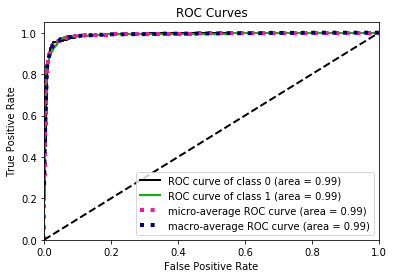

In [53]:
y_probas = y_pred = xgb.predict_proba(X_test_lasso)
skplt.metrics.plot_roc(y_test, y_probas)

Text(0.5, 1.0, 'Lift Curve of XGBoost')

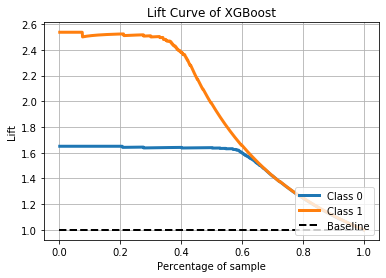

In [54]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.title('Lift Curve of XGBoost')

### Cost-Accuracy Combined Evaluation

In [57]:
def misclassification_cost(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cost = -10*fp + -1*fn
    return cost

cost_score = make_scorer(misclassification_cost, greater_is_better=False)

In [60]:
# Logistic Regression 
log_clf = LogisticRegression()
grid = GridSearchCV(log_clf, p_grid_log, cv = 10, scoring = cost_score)
grid.fit(X_train_lasso, y_train)
log_best_clf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

log_best_clf.fit(X_train_lasso, y_train)
cost_score(log_best_clf, X_test_lasso, y_test)

275

In [61]:
# Random Forest
rf_clf = RandomForestClassifier()
grid = RandomizedSearchCV(rf_clf, p_grid_rf, cv = 10, scoring = cost_score)
grid.fit(X_train_lasso, y_train)
rf_best_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_best_clf.fit(X_train_lasso, y_train)
cost_score(rf_best_clf, X_test_lasso, y_test)

202

In [63]:
# XGBoost
xgb_clf = XGBClassifier()
grid = RandomizedSearchCV(xgb_clf, p_grid_xgb, cv = 10, scoring = cost_score)
grid.fit(X_train_lasso, y_train)
xgb_best_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_best_clf.fit(X_train_lasso, y_train)
cost_score(xgb_best_clf, X_test_lasso, y_test)

254

In [64]:
# LightGBM
lgb_clf = lightgbm.LGBMClassifier()
grid = RandomizedSearchCV(lgb_clf, p_grid_lgb, cv = 10, scoring = cost_score)
grid.fit(X_train_lasso, y_train)
lgb_best_clf = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=20, n_jobs=-1, num_leaves=64, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_best_clf.fit(X_train_lasso, y_train)
cost_score(lgb_best_clf, X_test_lasso, y_test)

240

In [67]:
y_pred = rf_best_clf.predict(X_test_lasso)
accuracy_score(y_test, y_pred)

0.9565689467969598

In [68]:
print(confusion_matrix(y_test, y_pred))

[[540  18]
 [ 22 341]]


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       558
           1       0.95      0.94      0.94       363

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



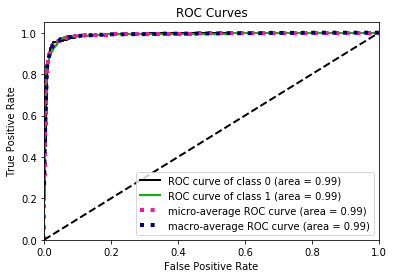

In [70]:
y_probas = y_pred = xgb.predict_proba(X_test_lasso)
skplt.metrics.plot_roc(y_test, y_probas)

Text(0.5, 1.0, 'Lift Curve of RandomForest')

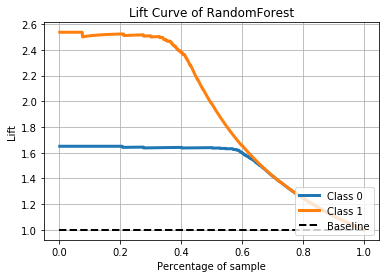

In [71]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.title('Lift Curve of RandomForest')